In [35]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [37]:
data_df = pd.read_csv("Project_data_csv")

In [38]:
data_df.shape

(270223, 30)

In [39]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Wickets Remaining,Extras,Over and Balls Total,Team Value,DLS %,Target Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.6,104,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.8,104,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.9,105,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,7,N/E,55,16,39.1,105,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,7,N/E,55,16,39.3,106,4.79,29.31,Australia,Yes


In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               270223 non-null  int64  
 1   batting_team             270223 non-null  object 
 2   bowling_team             270223 non-null  object 
 3   innings_num              270223 non-null  int64  
 4   over_col                 270223 non-null  int64  
 5   ball_col                 270223 non-null  int64  
 6   Match ID                 270223 non-null  int64  
 7   Start Date               270223 non-null  object 
 8   Runs                     270223 non-null  int64  
 9   Running Total            270223 non-null  int64  
 10  Batter out               270223 non-null  object 
 11  Wickets taken            270223 non-null  int64  
 12  Start Team               270223 non-null  object 
 13  Remaining Team           270223 non-null  object 
 14  Venu

In [41]:
remaining_onb = []
for index, row in data_df.iterrows():
    onb = (row['Remaining Overs']*6) + row['Remaining Balls']
    remaining_onb.append(onb)
remaining_onb_df = pd.DataFrame(remaining_onb)

In [42]:
remaining_onb_df

,0
0,179
1,178
2,177
3,176
4,175
...,...
270218,18
270219,17
270220,16
270221,15


Do I need to change the original data code to change batting team and bowling team to team 1 and team 2?  And should I remove 

In [43]:
winner_no = []
for index, row in data_df.iterrows():
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(1)
    else:
       winner_no.append(0)
       print(row['Winner'])

tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie


In [44]:
winner_no_df = pd.DataFrame(winner_no)

In [45]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [46]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (2,1,0 respectively)

In [47]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [48]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [49]:
data_df['Remaining overs and balls'] = remaining_onb_df[0]

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 270223 non-null  int64  
 1   batting_team               270223 non-null  object 
 2   bowling_team               270223 non-null  object 
 3   innings_num                270223 non-null  int64  
 4   over_col                   270223 non-null  int64  
 5   ball_col                   270223 non-null  int64  
 6   Match ID                   270223 non-null  int64  
 7   Start Date                 270223 non-null  object 
 8   Runs                       270223 non-null  int64  
 9   Running Total              270223 non-null  int64  
 10  Batter out                 270223 non-null  object 
 11  Wickets taken              270223 non-null  int64  
 12  Start Team                 270223 non-null  object 
 13  Remaining Team             27

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [51]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remaining overs and balls', 'Remainder']]

In [52]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [53]:
data_df

,Row ID,Wickets taken,Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,4.79,29.31,1,179,29.5
1,1,3,16,4.79,29.31,1,178,29.4
2,2,3,16,4.79,29.31,1,177,29.3
3,3,3,16,4.79,29.31,1,176,29.2
4,4,3,16,4.79,29.31,1,175,29.1
...,...,...,...,...,...,...,...,...
270218,270218,3,13,5.40,31.64,2,18,3.0
270219,270219,3,13,5.40,31.64,2,17,2.5
270220,270220,3,13,5.40,31.64,2,16,2.4
270221,270221,3,13,5.40,31.64,2,15,2.3


In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Row ID                     270223 non-null  int64  
 1   Wickets taken              270223 non-null  int64  
 2   Team Value                 270223 non-null  int64  
 3   Ground RPO                 270223 non-null  float64
 4   Ground RPW                 270223 non-null  float64
 5   Winner_num                 270223 non-null  int64  
 6   Remaining overs and balls  270223 non-null  int64  
 7   Remainder                  270223 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 16.5 MB


In [55]:
data_df.describe()

,Row ID,Wickets taken,Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
count,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,135111.000000,4.340881,12.531653,4.944435,30.351967,1.466067,104.967978,17.326729
std,78006.805233,2.190549,5.533073,0.353677,3.465019,0.524029,47.241142,7.871791
min,0.000000,0.000000,1.000000,3.980000,20.560000,0.000000,0.000000,0.000000
25%,67555.500000,3.000000,8.000000,4.720000,28.180000,1.000000,68.000000,11.200000
50%,135111.000000,4.000000,13.000000,4.850000,29.640000,1.000000,109.000000,18.100000
75%,202666.500000,6.000000,17.000000,5.090000,32.440000,2.000000,146.000000,24.200000
max,270222.000000,10.000000,29.000000,6.910000,53.080000,2.000000,180.000000,30.000000


#write some commentary here about the statistics

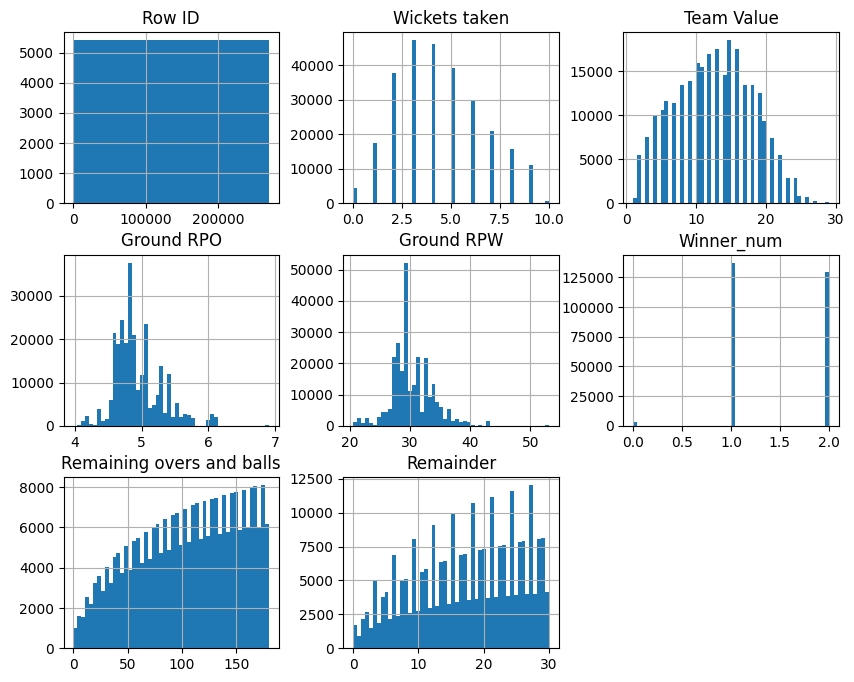

In [56]:
data_df.hist(bins=50, figsize=(10, 8))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder funny - should I do it in balls rather than remainder?  Might make more sense.

In [57]:
data_df['Winner_num'].value_counts()

Winner_num
1    137321
2    129422
0      3480
Name: count, dtype: int64

In [58]:
data_df.shape

(270223, 8)

In [59]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [60]:
train_set, test_set = split_data_with_id_hash(data_df, 0.2, "Row ID")

In [61]:
train_set.shape

(216178, 8)

In [62]:
test_set.shape

(54045, 8)

In [63]:
data_train = train_set.copy()

In [64]:
data_train

,Row ID,Wickets taken,Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,4.79,29.31,1,179,29.5
1,1,3,16,4.79,29.31,1,178,29.4
3,3,3,16,4.79,29.31,1,176,29.2
4,4,3,16,4.79,29.31,1,175,29.1
6,6,3,16,4.79,29.31,1,173,28.5
...,...,...,...,...,...,...,...,...
270216,270216,3,13,5.40,31.64,2,20,3.2
270218,270218,3,13,5.40,31.64,2,18,3.0
270219,270219,3,13,5.40,31.64,2,17,2.5
270220,270220,3,13,5.40,31.64,2,16,2.4


In [65]:
corr_matrix = data_train.corr()
corr_matrix['Winner_num']

Row ID                       0.019944
Wickets taken               -0.446453
Team Value                   0.447838
Ground RPO                   0.015078
Ground RPW                   0.022438
Winner_num                   1.000000
Remaining overs and balls    0.041988
Remainder                    0.041994
Name: Winner_num, dtype: float64

In [66]:
data_train

,Row ID,Wickets taken,Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,4.79,29.31,1,179,29.5
1,1,3,16,4.79,29.31,1,178,29.4
3,3,3,16,4.79,29.31,1,176,29.2
4,4,3,16,4.79,29.31,1,175,29.1
6,6,3,16,4.79,29.31,1,173,28.5
...,...,...,...,...,...,...,...,...
270216,270216,3,13,5.40,31.64,2,20,3.2
270218,270218,3,13,5.40,31.64,2,18,3.0
270219,270219,3,13,5.40,31.64,2,17,2.5
270220,270220,3,13,5.40,31.64,2,16,2.4


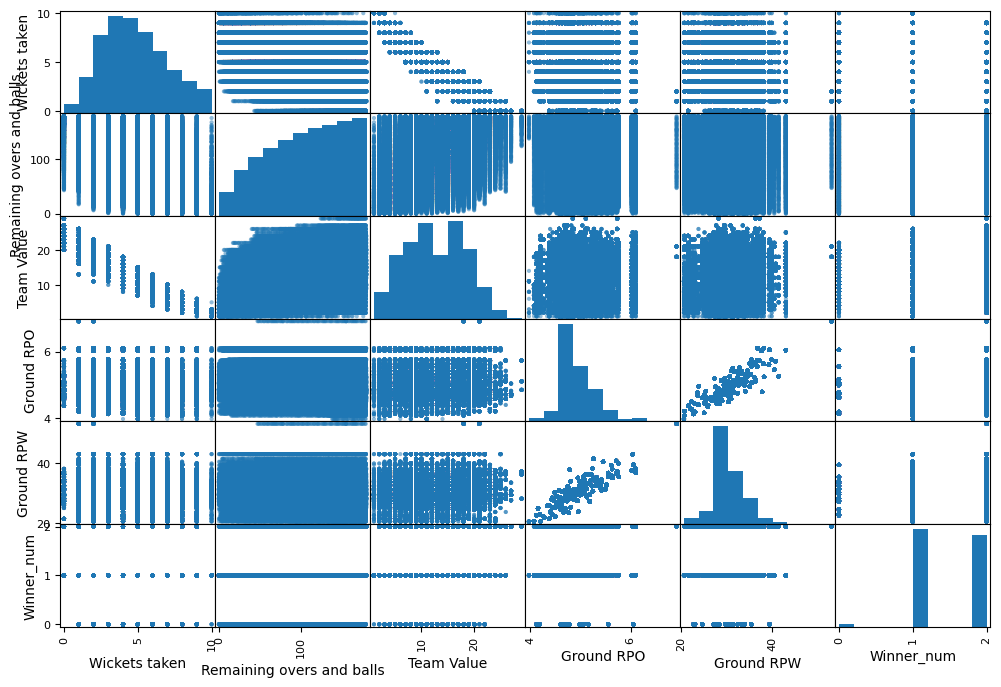

In [67]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remaining overs and balls", "Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(12, 8))
plt.show()

Experiment with Attribute combinations

Commentary

Shall I plot the Winner before I categorise?
Very imbalanced - 1 and 2 mainly fine but 0 not.

Be careful that any data added is to the end, given the row index is a unique iD.

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network

Split the data